<a href="https://colab.research.google.com/github/votrannhatquang/AI-s-ng-th-7/blob/main/ST7_Ai_14_4(deeplearning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from keras.datasets import fashion_mnist 
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [30]:
x_train = x_train.reshape(60000, 28, 28)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000,28,28,1)
x_test = x_test.astype('float32')/255



In [31]:
from keras.utils import to_categorical
y_test=to_categorical(y_test,10)
y_train=to_categorical(y_train,10)

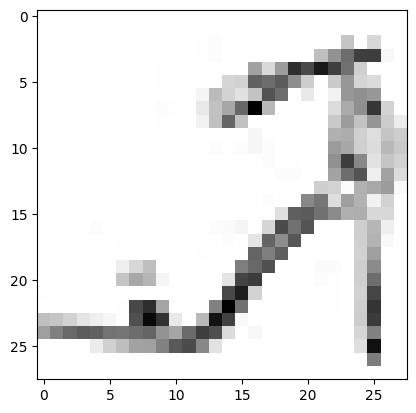

so: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [32]:
import matplotlib.pyplot as plt 
digit= x_train[8]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('so:',y_train[8])

<ipython-input-33-e40275237779>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,i+1)


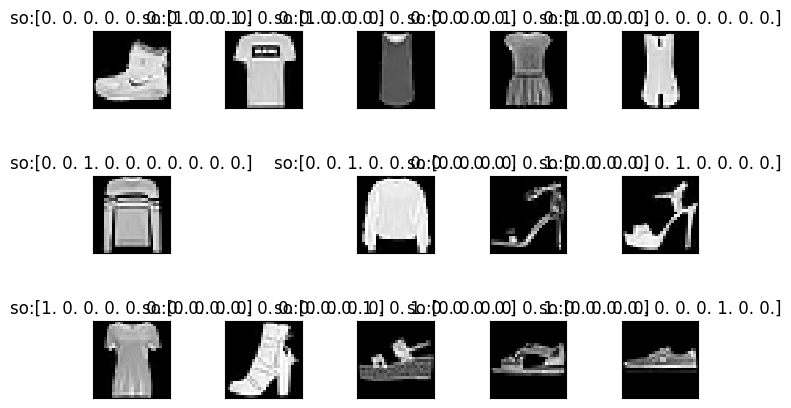

In [33]:
for i in range (15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',interpolation='none')
  plt.title('so:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [43]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

#32 lan tich chap
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'linear',input_shape=(28,28,1),padding='Same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

#64 lan tich chap
model.add(Conv2D(64,(3,3),activation ='linear',padding ='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

#128 lan tich chap
model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation = 'linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))

from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,batch_size=64,epochs = 20,verbose = 1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [45]:
model.save('test2.h5')